In [3]:
#imported the packages
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#load trulia  dataset from webscrap
trulia = pd.read_csv('data/trulia.csv')
df = pd.DataFrame(data=trulia)

#clean columns datatypes
df['SalesDate'] = pd.to_datetime(df['SalesDate'])
df['Price']= pd.to_numeric(df['Price'], downcast= 'signed')
df['Sqft']= pd.to_numeric(df['Sqft'], downcast= 'signed')
df['NumBath']= pd.to_numeric(df['NumBath'], downcast= 'signed')
df.dtypes

SalesDate      datetime64[ns]
Price                 float64
NumBedrooms             int64
NumBath               float64
Sqft                  float64
Address                object
City                   object
State                  object
dtype: object

In [5]:
df.head()

,SalesDate,Price,NumBedrooms,NumBath,Sqft,Address,City,State
0,2020-11-23,226000.0,1,1.0,2112.0,362 Crosby Ave,Kenmore,NY
1,2020-11-23,175000.0,3,2.0,1163.0,308 Kirkwood Dr,West Seneca,NY
2,2020-11-23,110000.0,6,2.0,2476.0,207 Amber St,South Park,NY
3,2020-11-23,84000.0,1,1.0,1673.0,102 Ladner Ave,South Park,NY
4,2020-11-23,217000.0,4,3.0,1810.0,326 Woodward Dr,West Seneca,NY


In [6]:
#basic descriptive statistics
df['Price'].describe().apply("{0:.2f}".format)

count        4630.00
mean       184652.41
std        227985.35
min             1.00
25%         88000.00
50%        155000.00
75%        223418.50
max      10541075.00
Name: Price, dtype: object

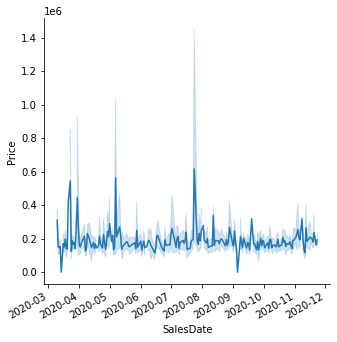

In [84]:
g = sns.relplot(x="SalesDate", y="Price", kind="line", data=df)
g.fig.autofmt_xdate()

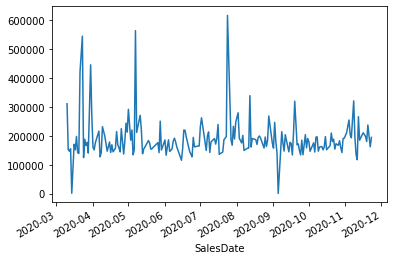

In [85]:
df.groupby('SalesDate').mean()["Price"].plot()


In [31]:
# https://facebook.github.io/prophet/docs/saturating_forecasts.html#forecasting-growth
from fbprophet import Prophet

#load dataset
zillow = pd.read_csv('data/zillow.csv')

#create dataframe
df2 = pd.DataFrame(data=zillow)

#filter columns for Buffalo
zdf = df2[ (df2.State == "NY") & (df2.Metro == "Buffalo-Cheektowaga-Niagara Falls" )  ]


In [36]:
zdf.head()

# # saving the DataFrame as a CSV file 
# zdf_data = df.to_csv('zdf.csv', index = True) 

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31
371,63478,373,14221,Zip,NY,NY,Town Of Amherst,Buffalo-Cheektowaga-Niagara Falls,Erie County,121681.0,...,261786.0,262193.0,262613.0,263834.0,264912.0,266491.0,268345.0,271471.0,275839.0,280663.0
543,63414,546,14094,Zip,NY,NY,North Tonawanda,Buffalo-Cheektowaga-Niagara Falls,Niagara County,86204.0,...,163037.0,163824.0,164645.0,165905.0,166731.0,167718.0,168641.0,170071.0,171558.0,173098.0
935,63428,942,14120,Zip,NY,NY,North Tonawanda,Buffalo-Cheektowaga-Niagara Falls,Niagara County,94944.0,...,171648.0,172210.0,172676.0,173704.0,174528.0,175539.0,176717.0,178343.0,180052.0,181719.0
950,63405,957,14075,Zip,NY,NY,Town of Hamburg,Buffalo-Cheektowaga-Niagara Falls,Erie County,106236.0,...,202672.0,203309.0,203598.0,204639.0,205341.0,206662.0,208173.0,210728.0,213857.0,217416.0
1023,63447,1030,14150,Zip,NY,NY,Tonawanda,Buffalo-Cheektowaga-Niagara Falls,Erie County,77161.0,...,154072.0,154642.0,154961.0,155721.0,156412.0,157501.0,158992.0,161263.0,164072.0,167395.0


In [44]:
# Prophet class features
# dir(Prophet)
new_df = pd.read_csv('data/sample.csv')
new_df.head()

,dates,price,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName
0,1/31/96,61596,63472.0,2282.0,14215.0,Zip,NY,NY,Buffalo,Buffalo-Cheektowaga-Niagara Falls,Erie County
1,2/29/96,61183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/31/96,60779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/30/96,60138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/31/96,59821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
del new_df['RegionID']
del new_df['SizeRank']
del new_df['RegionName']
del new_df['RegionType']
del new_df['StateName']
del new_df['State']
del new_df['City']
del new_df['Metro']
del new_df['CountyName']

#prophet needs dates as ds and y forecasting
new_df.rename(columns={'dates': 'ds', 'price':'y'}, inplace=True)
new_df.head()

,ds,y
0,1/31/96,61596
1,2/29/96,61183
2,3/31/96,60779
3,4/30/96,60138
4,5/31/96,59821


In [46]:
#Initalize the Model
model = Prophet()

#fit the model to our dataset
model.fit(new_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
new_df.shape

(298, 2)

In [75]:
future = model.make_future_dataframe(periods=12*3, freq='m') 

In [76]:
future.shape

(334, 1)

In [81]:
future.tail()

,ds
329,2023-06-30
330,2023-07-31
331,2023-08-31
332,2023-09-30
333,2023-10-31


In [78]:
#make predictions
assumptions = model.predict(future)

In [79]:
assumptions.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-31,58746.857826,56127.514169,61357.733171,58746.857826,58746.857826,104.440612,104.440612,104.440612,104.440612,104.440612,104.440612,0.0,0.0,0.0,58851.298437
1,1996-02-29,58651.680470,56428.762631,61633.706764,58651.680470,58651.680470,347.373841,347.373841,347.373841,347.373841,347.373841,347.373841,0.0,0.0,0.0,58999.054311
2,1996-03-31,58549.939159,55755.877033,60920.713055,58549.939159,58549.939159,-99.742821,-99.742821,-99.742821,-99.742821,-99.742821,-99.742821,0.0,0.0,0.0,58450.196337
3,1996-04-30,58451.479825,55428.060929,60757.580024,58451.479825,58451.479825,-352.621738,-352.621738,-352.621738,-352.621738,-352.621738,-352.621738,0.0,0.0,0.0,58098.858087
4,1996-05-31,58349.738514,55376.226762,60461.654382,58349.738514,58349.738514,-256.584084,-256.584084,-256.584084,-256.584084,-256.584084,-256.584084,0.0,0.0,0.0,58093.154430


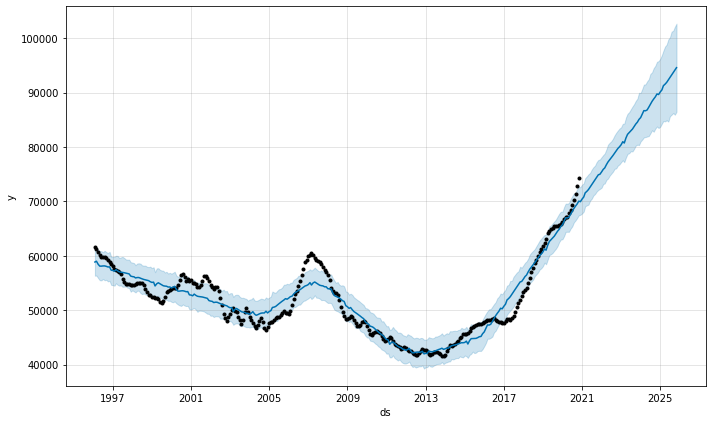

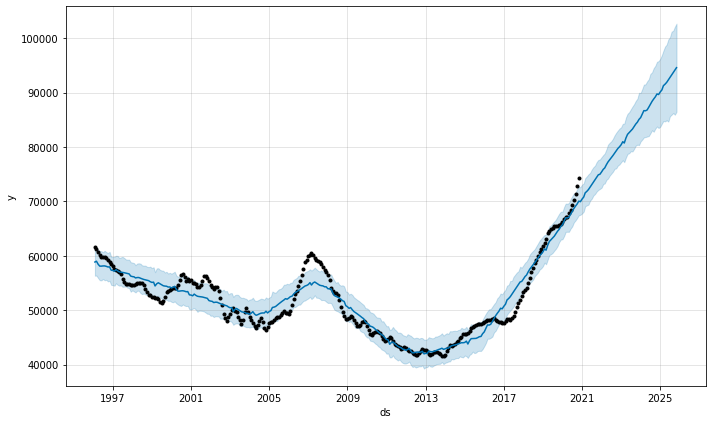

In [74]:
model.plot(assumptions)

#black dot are actual data points

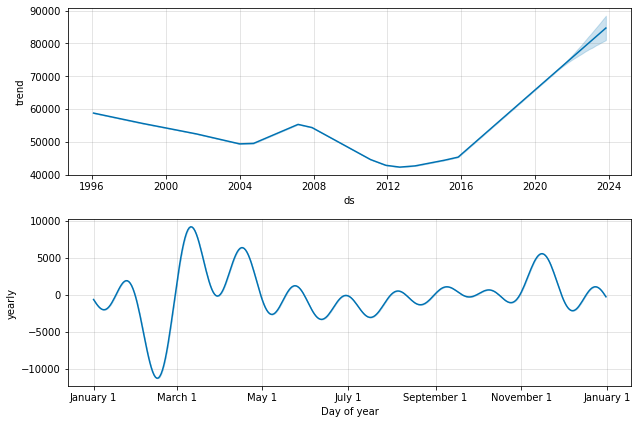

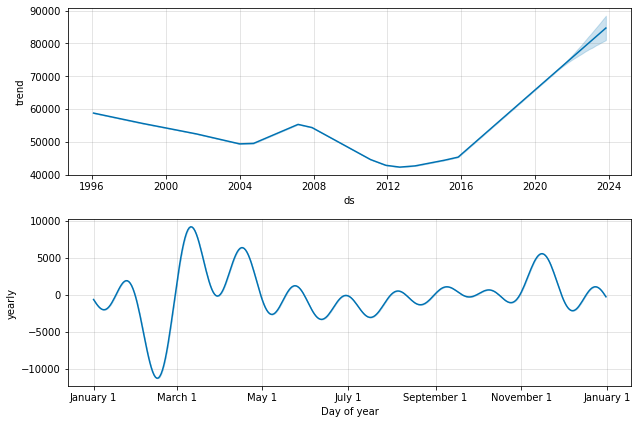

In [80]:
#visualize the trends
model.plot_components(assumptions)